In [3]:
#Load the dataset 

import pickle
import numpy as np

# Load training and validation sets
with open('ECG5000_train.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('ECG5000_validation.pickle', 'rb') as f:
    val_data = pickle.load(f)

# Combine in one dict if needed
ECGdataset = {
    'train': train_data,
    'val': val_data
}

# Print first sample (label and time series)
print("First sample:", ECGdataset['train'][0])

# Print the first feature of the 10th sample

tenth_sample = ECGdataset['train'][9]
print("10th sample:", tenth_sample)
print("Type of 10th sample:", type(tenth_sample))


First sample: [ 0.         -0.11252183 -2.8272038  -3.7738969  -4.3497511  -4.376041
 -3.4749863  -2.1814082  -1.8182865  -1.2505219  -0.47749208 -0.36380791
 -0.49195659 -0.42185509 -0.30920086 -0.4959387  -0.34211867 -0.35533627
 -0.36791303 -0.31650279 -0.41237405 -0.47167181 -0.41345783 -0.36461703
 -0.44929829 -0.47141866 -0.42477658 -0.46251673 -0.55247236 -0.47537519
 -0.6942     -0.7018681  -0.59381178 -0.66068415 -0.71383066 -0.76980688
 -0.67228161 -0.65367605 -0.63940562 -0.55930228 -0.59167032 -0.49322332
 -0.46305183 -0.30164382 -0.23273401 -0.12505488 -0.15394314 -0.0243574
 -0.06560876  0.03499926  0.06193522  0.07119542  0.12392505  0.10312371
  0.22522849  0.12868305  0.30248315  0.25727621  0.19635161  0.17938297
  0.24472863  0.34121687  0.32820441  0.40604169  0.44660507  0.42406823
  0.48151204  0.4778438   0.62408259  0.57458456  0.59801319  0.5645919
  0.607979    0.62063457  0.65625291  0.68474806  0.69427284  0.66558377
  0.57579577  0.63813479  0.61491695  0.5

In [4]:
#Preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

def preprocess_dataset(dataset):
    X = []
    y = []

    for sample in dataset:
        label = sample[0]
        features = sample[1:]  # time-series (140,)
        
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(np.array(features).reshape(-1, 1)).flatten()  # shape back to (140,)
        
        X.append(features_scaled)
        y.append(label)

    X = np.array(X)
    y = np.array(y)

    # Reshape for CNN input: (samples, time_steps, 1)
    X = X[..., np.newaxis]
    return X, y
    
X_train, y_train = preprocess_dataset(ECGdataset['train'])
X_val, y_val = preprocess_dataset(ECGdataset['val'])



In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
#Train a CNN Classifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout

# Define the model
model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(140, 1)),
    MaxPooling1D(pool_size=2),
    
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    GlobalAveragePooling1D(),
    
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_train)), activation='softmax')  # Softmax for multi-class
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # assuming integer labels
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val))


C:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.4826 - loss: 1.4816 - val_accuracy: 0.5207 - val_loss: 1.1224
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5511 - loss: 1.0132 - val_accuracy: 0.5207 - val_loss: 0.9655
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6251 - loss: 0.8576 - val_accuracy: 0.5853 - val_loss: 0.9131
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6927 - loss: 0.8021 - val_accuracy: 0.6847 - val_loss: 0.8487
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7228 - loss: 0.7487 - val_accuracy: 0.8113 - val_loss: 0.7701
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7744 - loss: 0.7163 - val_accuracy: 0.8540 - val_loss: 0.6884
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8469 - loss: 0.6274 - val_accuracy: 0.8580 - val_loss: 0.6305
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8583 - loss: 0.5702 - val_accuracy: 0.8580 - v

In [15]:
#Validate the classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Step 1: Predict validation set classes
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Compute metrics
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred, average='macro')
rec = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')
auc = roc_auc_score(y_val, y_pred_probs, multi_class='ovr')
cf_matrix = confusion_matrix(y_val, y_pred)
specificity_per_class = []
for i in range(cf_matrix.shape[0]):
    # True Negative: sum of all elements not in row i and column i
    tn = np.sum(np.delete(np.delete(cf_matrix, i, axis=0), i, axis=1))
    # False Positive: sum of column i except the diagonal element
    fp = np.sum(np.delete(cf_matrix[:, i], i))
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_per_class.append(specificity)
# Macro average specificity
avg_specificity = np.mean(specificity_per_class)
# Step 3: Print results with 4 decimal places
print("Model Performance (CNN):")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUROC: {auc:.4f}")
print(f"Specificity (Macro Avg): {avg_specificity:.4f}")


# Step 4: Save for comparison
model_performance_cnn = [acc, prec, rec, f1, auc]
# cf_matrix = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:")
print(cf_matrix)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model Performance (CNN):
Accuracy: 0.8733
Precision: 0.3494
Recall: 0.3802
F1 Score: 0.3640
AUROC: 0.8075
Specificity (Macro Avg): 0.9517

Confusion Matrix:
[[770  11   0   0   0]
 [ 50 540   0   0   0]
 [ 18  25   0   0   0]
 [ 37  38   0   0   0]
 [  7   4   0   0   0]]


C:\Users\purva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(50.722222222222214, 0.5, 'True Labels')

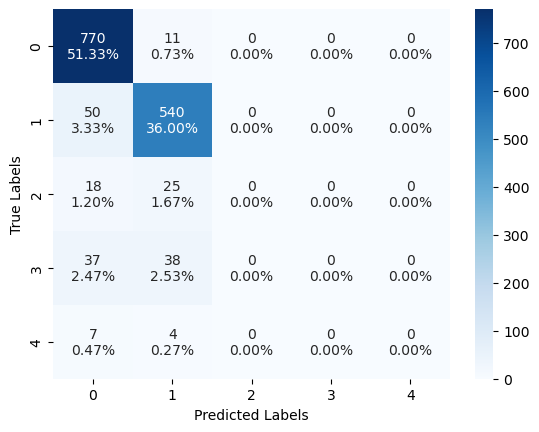

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=100)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')